# Gaussian Mixture Validation

Validation code that simulates reaction time data and use gaussian mixture classification to study the recovery accuracy of the reaction time data. 

TODOs: 
1. [x] Simulate reaction time data using mixture of exponential normal distribution with various means and variances, or parameters, Evaluate the recoverability of the gaussian mixture on such models using classification accuracy measure with various means and variances. Set a threshold for the reliability 

2. [x] Participantwise Model Goodness of Fit Comparison 

3. [x] To make the experiment more rigorious, add mean and variance to the method. 


an exponenitially modified normal continuous random variable 

rt data have disperse distributions toward longer RTS

a dominant feature of RTs is the standard deviation increases linearly with the mean.
One parameter that changes both. 

An exponentially modified Normal continuous random variable


the pdf of the exponentially modififed normal distribution can be understood as the sum of independent normal and exponential random variables, an exgayssian random variable Z can be expressed as Z = X + Y, where X and U are independent, X is gaussian distributed with mean mu and variance sigma square, and Y is exponential of rate lambda. 

Y can be some random process that is exponenitally distributed. 

Here we inherently assume that the two reaction time are both exponentially modified normally distributed. 


There are three parameters, lambda, which is the rate of the exponential component
sigma square, which is the variance pf the gaussian component
and mu, which is the mean of the gaussian component



In [1]:
from scipy.stats import exponnorm
from analysis_util import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Generate histogram of specified parameters

# Study parameter dependency

Exponentially modifed Gaussian distribution is used to simulate participants' reaction time for the vaidation method. This comes from the idea that exponentially modified gaussian generatives strictly positive reaction times, and has been suggested by some literature that it can be a better model than log normal to model reaction time distribution. 

lambda controlls the decay rate of the exponential component, the smaller the lambda the slower the decay rate. 
mu is the parameter that adjusts the mean of the distribution, the higher mu the higher the distribution. 
sigma controls the spread of the distribution, the bigger the wider. 


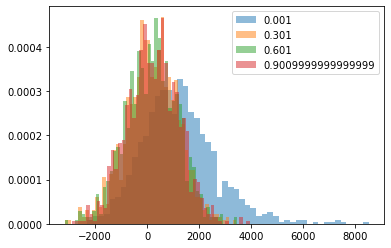

In [2]:
# What happens when different parameters changes


sigma = 1000
mu = 200
fig, ax = plt.subplots(1, 1)
lambdas = np.arange(0.001,1,0.3)
for lambd in lambdas: 
    r_within = exponnorm.rvs(1/(sigma*lambd),mu,sigma, size=1000)
    ax.hist(r_within, bins = 50, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(list(lambdas))    
plt.show()



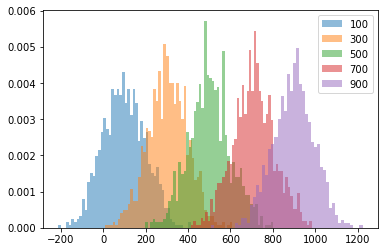

In [3]:
# What happens when different parameters changes
sigma = 100
fig, ax = plt.subplots(1, 1)
lambd = 1
mus = np.arange(100,1000,200)
for mu in mus: 
    r_within = exponnorm.rvs(1/(sigma*lambd),mu,sigma, size=1000)
    ax.hist(r_within, bins = 50, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(list(mus))    
plt.show()


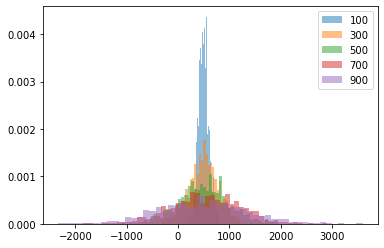

In [4]:
# What happens when different parameters changes
mu = 500
fig, ax = plt.subplots(1, 1)
lambd = 1
sigmas = np.arange(100,1000,200)
for sigma in sigmas: 
    r_within = exponnorm.rvs(1/(sigma*lambd),mu,sigma, size=1000)
    
    ax.hist(r_within, bins = 50, density=True, histtype='stepfilled', alpha=0.5)
ax.legend(list(mus))    
plt.show()

In [12]:
def evaluate_classification_accuracy(ground_truth, classification):
    return np.sum(np.abs(ground_truth == classification))/len(ground_truth)

mu_within = 200
d_mu = 200 # difference in mean
mu_betw = mu_within + d_mu
lambda_within = 1
lambda_betw = lambda_within
sigma_within = 100
sigma_betw = 80


sigma = sigma_within
lambd = lambda_within
mu = mu_within
K = 1/(sigma*lambd)
mean, var, skew, kurt = exponnorm.stats(K,mu,sigma, moments='mvsk')

r_within = exponnorm.rvs(1/(sigma_within*lambda_within),mu_within,sigma_within, size=100)



print(np.concatenate([r_within,r_within]))
# plt.show()

[189.73089187 370.54346475 168.44704729 286.33902304 152.08941536
 363.52588898 279.66642935 309.48665884 164.72749002 176.32204034
 169.53116034 222.17233138 174.97904195 120.38465455 190.61936512
  65.34065223 295.67365444 259.81520723 203.82403909 166.84073047
 220.84793813 166.55164749 288.03036143 150.50994034 263.9707417
 119.09646799 198.15856765 244.20616761 101.68382565 285.67833956
 224.86112099  91.75625616 334.48587297  60.04543996 312.92910286
 234.59581403 254.71062439 268.9645242  142.55201341 129.31216048
 264.95462714 190.87363552 248.41761729 249.27203069 381.06788637
 422.90521821 182.1723619  174.13119943 150.95171456 185.93100911
 157.09667608 149.84340011 255.87440368 275.80515666 282.7010293
 139.57975078 298.26687509 211.78025072 183.38061111 155.0152285
 117.65920429 283.19383913 159.78760404 189.39142285 304.34616649
 139.36586612  34.24144306 181.2475942  200.82616175 312.18010903
 286.43695323 137.22821365 268.01618603 197.84279875 300.63120955
 459.04614273

In [ ]:
r_within = exponnorm.rvs(1/(sigma_within*lambda_within),mu_within,sigma_within, size=1000)
r_betw = exponnorm.rvs(1/(sigma_betw*lambda_betw),mu_betw,sigma_betw, size=1000)
print(r_within)


How classification accuracy changed between different parameters

In [20]:
lambda_within = 1# same decay for both
lambda_betw = lambda_within
n_within = 500# number of within_chunk_reaction times
n_between = 500
sigma_within_set = list(np.arange(80,150,10))
sigma_betw_set = list(np.arange(80, 150,10))
mu_diff_set = list(np.arange(100,800,20))# used to be 200 to 1000
acc_record = np.zeros([len(sigma_within_set),len(sigma_betw_set), len(mu_diff_set)])

print(sigma_within_set)

[80, 90, 100, 110, 120, 130, 140]


In [21]:
n_sample = 1
for i in range(0,len(sigma_within_set)):
    for j in range(0, len(sigma_betw_set)):
        for k in range(0, len(mu_diff_set)):
            # generate reaction time by sampling from two exponential normal distribution          
            sigma_within = sigma_within_set[i]
            sigma_betw = sigma_betw_set[j]
            mu_diff = mu_diff_set[k]
            mu_within = 200
            mu_betw = mu_within + mu_diff
            r_within = exponnorm.rvs(1/(sigma_within*lambda_within),mu_within,sigma_within, size=n_within)
            r_betw = exponnorm.rvs(1/(sigma_betw*lambda_betw),mu_betw,sigma_betw,size = n_between)
            r_mixed = np.concatenate([r_within,r_betw])
            ground_truth = np.ones(r_mixed.shape, dtype = bool)
            ground_truth[len(r_within):] = False
            
            accuracy = np.zeros(n_sample)
            for s in range(0,n_sample):
                _,classification = mixture_gaussian_classification(r_mixed.reshape((-1,1)))
                accuracy[s] = evaluate_classification_accuracy(ground_truth, classification)
            acc_record[i,j,k] = np.mean(accuracy)
            # classify r_mixed 

# make parameter varying plot. 

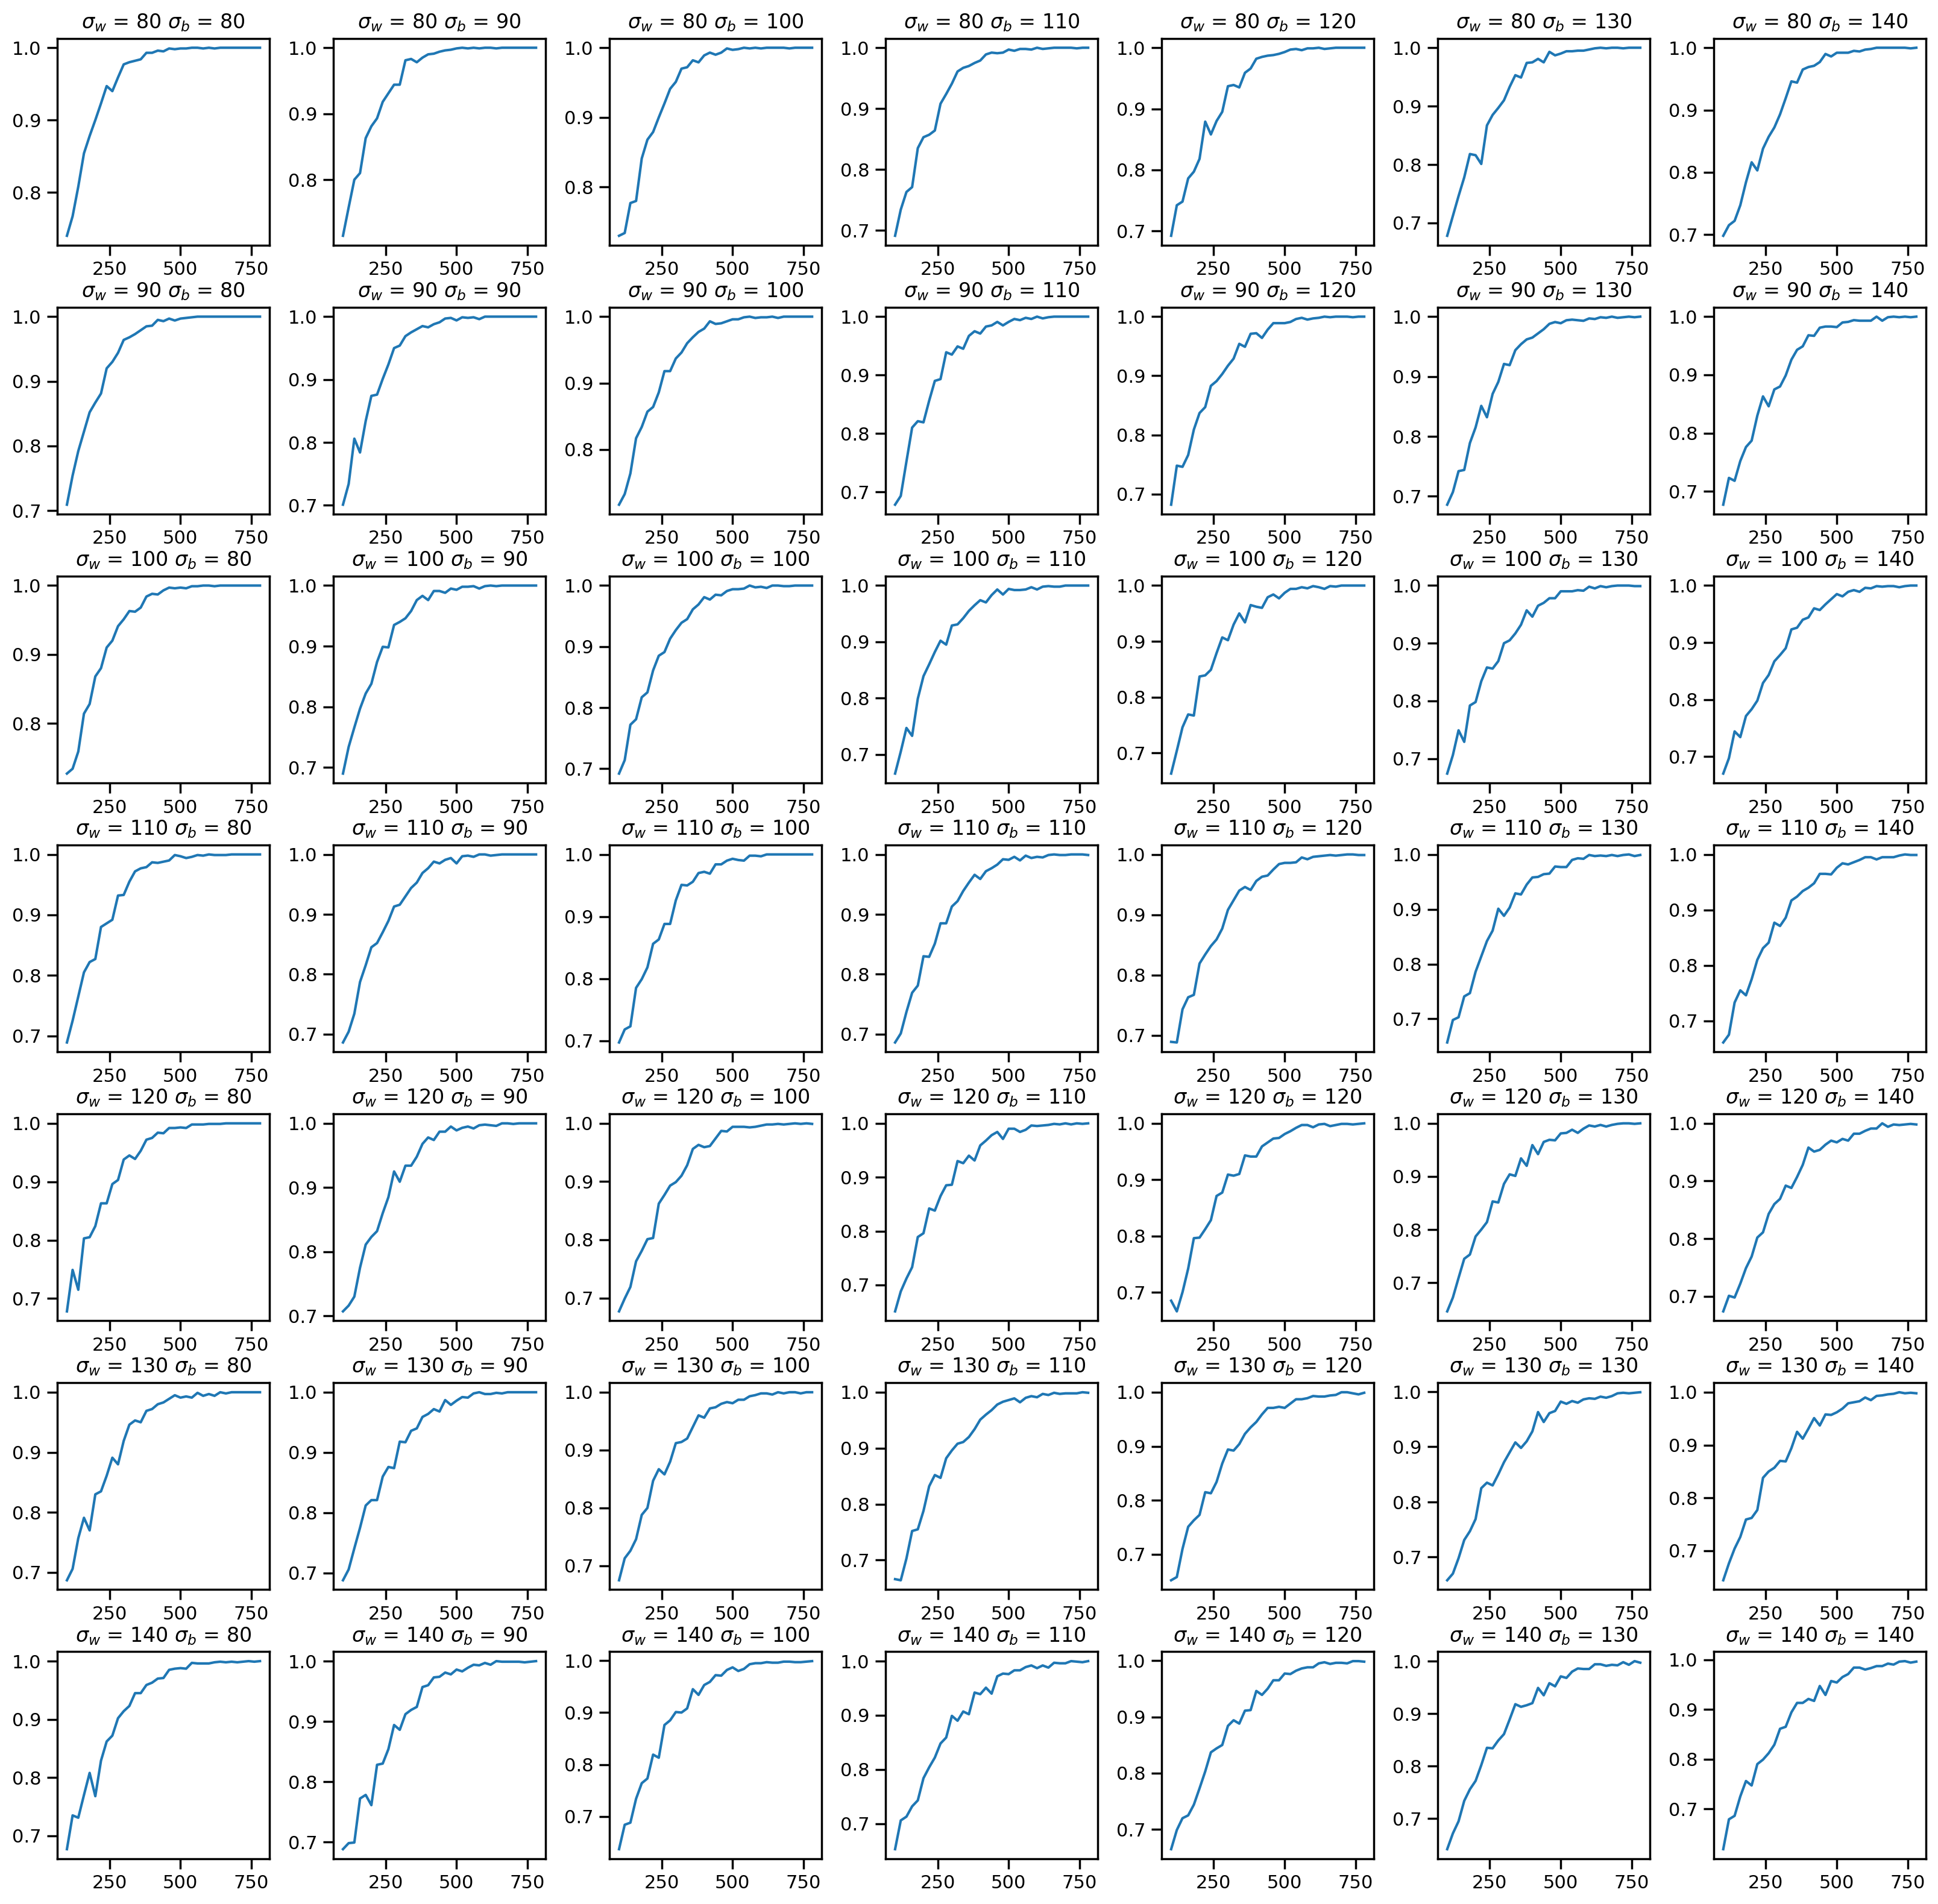

In [22]:
plt.figure(figsize = (20,20), dpi = 200)

# fig, axes = plt.subplots(len(sigma_within_set), len(sigma_betw_set))
plt.tight_layout(pad = 0.1) # Or equivalently,  "plt.tight_layout()"

k = 0
for i in range(1,1+len(sigma_within_set)):
    for j in range(1, 1+len(sigma_betw_set)):
        k = k + 1
        plt.subplot(len(sigma_within_set), len(sigma_betw_set),k)
        plt.plot(mu_diff_set, acc_record[i-1,j-1,:])
        titl = '$\sigma_w$ = ' + str(sigma_within_set[i-1]) + ' $\sigma_b$ = ' + str(sigma_betw_set[j-1])
#         plt.xlabel('mean difference')
#         plt.ylabel('accuracy')
#         plt.ylim([0.7,1.0])
        plt.title(titl)

plt.subplots_adjust(wspace=0.3, hspace = 0.3)

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

plt.show()

In [23]:
# within chunk reaction time is assumed to have mean 200, standardeviation of 100, and between chunk reaction time has a mean of 400, and
# and sigma = 90. Finally, the kurtosis of the two distributions are fixed to be one. Thereby, we generate 
# 500 samples of within chunk reaction time, and 500 samples of between chunk reaction time, so that the total is aligned
# with the number of data points collected from each participant in an entire experiment. 
# additional, we vary the mean difference between the two distribution from 200 ms to 1000 ms in 20 steps, 
# and the variance between the two distribution is varying from 80 to 150 in steps of 10. 
# figure xxx plots the recovery accuracy of the mixture of gaussian classification on an x access of increasing mean difference
# and y axis of accuracy. From left to right,the between chunk reaction time increases,
# from up to down, the within chunk reaction time increases. 
# note that the worst recovery scenario is when the rt has a small difference in mean, and both variances are big.
# even in these cases, above 75% of the reaction times are classified correctly. 

# concern, if the standard deviation is 100ms, then the gaussian mixture is not very good to distinguish the two distributions
# and would make some mistakes. On the other hand, if the reaction time is in the small or large mixture end, they would be
# classified correspondingly. 

In [24]:
vals = exponnorm.ppf([0.001, 0.5, 0.999], K)
np.allclose([0.001, 0.5, 0.999], exponnorm.cdf(vals, K))

True

In [25]:
r = exponnorm.rvs(K, size=1000)

Generate distirbutiions with two exponential gaussian distribution with different means, variances, and exponential exponential decay rates, and test the error rate of misclassification when one reaction time is categorized as another 

In [26]:
# code that does the gaussian mixture model classicition
def mixture_gaussian_classification(time_collect):
    # group level behavioral comparison: 
    within_chunk = np.zeros([1*1000], dtype =bool)
    p_within_chunk = np.zeros([1*1000])
    
    AIC, BIC, model = learn_gaussian_mixture(time_collect,n_mixture = 2)
    model = model[0]
    within_chunk_model_index = np.argmin(model.means_)
    reaction_time = np.array(time_collect)
    responsibilities = model.predict_proba(reaction_time.reshape(-1, 1))# likelihood of belonging to which gaussian mixture
    prediction = model.predict(reaction_time.reshape(-1, 1))# likelihood of belonging to which gaussian mixture
    within_chunk = (prediction == within_chunk_model_index)
    p_within_chunk = responsibilities[:,within_chunk_model_index]
    return p_within_chunk, within_chunk

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

def learn_gaussian_mixture(X,n_mixture = 3):
    N = [n_mixture] #np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    return AIC, BIC, models

# Second part, participant wise model fit comparison. 

for each participant, we would like to know how GOOD the model fits with 2 mixture, 1 mixture, and three mixture, using goodness of fit parameter such as the bayesian information criteria. 

# Also, plot the mean difference of gaussian mixture, in addition to variance and mean

In [64]:
data = {}
data['id'] = []
data['AIC 1 Mixture'] = []
data['AIC 2 Mixture'] = []
data['AIC 3 Mixture'] = []
data['BIC 1 Mixture'] = []
data['BIC 2 Mixture'] = []
data['BIC 3 Mixture'] = []
#data['within rt'] = []
#data['between rt'] = []
data['Experiment'] = []

ott = [1,2,3]
mdata = {}
mdata['id'] = []
mdata['Best N Mixture AIC'] = []
mdata['Experiment'] = []
mdata['Best N Mixture BIC'] = []

mdata['mean1'] = [] # this is for the mixture of 2 gaussians
mdata['mean2'] = []
mdata['std1'] = []
mdata['std2'] = []
mdata['mdiff'] = []# mean difference


In [65]:
pathex1 = '../data/filtered_exp1.csv'
df = pd.read_csv(pathex1)
import random
within_chunk = np.zeros([len(np.unique(df['id']))*1000], dtype = bool)
p_within_chunk = np.zeros([len(np.unique(df['id']))*1000])
i = 0
for ID in np.unique(df['id']):    
    this_subject = df[df['id'] == ID] # set to one particular subject
    X = np.array(this_subject['timecollect'][this_subject['timecollect']<1000])# when using np.log, make sure nan and infinity are excluded. 
    X = X.reshape(-1,1)
    data['id'].append(ID)
    data['Experiment'].append(1)
    AIC1, BIC1, model = learn_gaussian_mixture(X, n_mixture = 1)
    #print(model[0].means_)
    data['AIC 1 Mixture'].append(AIC1[0])
    data['BIC 1 Mixture'].append(BIC1[0])
    AIC2, BIC2, model = learn_gaussian_mixture(X, n_mixture = 2)
    
    mdata['mean1'].append(model[0].means_[0][0])
    mdata['mean2'].append(model[0].means_[1][0])
    mdata['std1'].append(np.sqrt(model[0].covariances_[0][0][0]))
    mdata['std2'].append(np.sqrt(model[0].covariances_[1][0][0]))
    mdata['mdiff'].append(abs(model[0].means_[0][0] - model[0].means_[1][0]))
    print(model[0].means_[0][0],model[0].means_[1][0])
    print(np.sqrt(model[0].covariances_[0][0][0]), np.sqrt(model[0].covariances_[1][0][0]))
    print('mean difference ', abs(model[0].means_[0][0] - model[0].means_[1][0]))
    data['AIC 2 Mixture'].append(AIC2[0])
    data['BIC 2 Mixture'].append(BIC2[0])
    AIC3, BIC3, model = learn_gaussian_mixture(X, n_mixture = 3)
    data['AIC 3 Mixture'].append(AIC3[0])
    data['BIC 3 Mixture'].append(BIC3[0])    

    mdata['id'].append(ID)
    mdata['Best N Mixture AIC'].append(str(ott[np.argmin([AIC1, AIC2, AIC3])]))
    mdata['Best N Mixture BIC'].append(str(ott[np.argmin([BIC1, BIC2, BIC3])]))
    mdata['Experiment'].append(1)
    i = i+1
    if i >=100:break

416.03053565560685 575.0698007662892
72.02951604429585 119.60467452567033
mean difference  159.03926511068232
385.8213082518886 561.7370053341704
42.31355245092852 126.41557621579513
mean difference  175.91569708228178
448.83500997432975 307.5762000576516
133.40948610339385 58.6561715722984
mean difference  141.25880991667816
466.13305015301376 602.866830294944
64.99782884096435 143.88768900006255
mean difference  136.7337801419302
890.4178544023415 765.6844763948524
62.78199362622222 66.24988635964785
mean difference  124.73337800748914
742.0494927462789 878.4686923376981
64.97909566347734 63.18140391649298
mean difference  136.41919959141921
393.9439075211922 567.2357195971529
67.33158787053353 141.5793432828322
mean difference  173.29181207596065
598.6218245664217 803.9402843608792
80.49567757904316 99.2446957695568
mean difference  205.31845979445757
775.5913705382857 882.1862843416245
99.93973237631558 67.06791928221075
mean difference  106.59491380333884
297.1812853900462 449.200

535.2910202324616 432.4030174231368
146.87410696725428 74.29617307475937
mean difference  102.8880028093248
454.67560754844567 397.95827944759674
136.3216601683214 55.941255743813
mean difference  56.71732810084893
518.1808049892732 665.5746463229362
63.183733100199824 115.47242610305616
mean difference  147.3938413336631
829.8073154252795 696.3760134656088
81.95380282267784 104.42136511962352
mean difference  133.4313019596707
619.4551393161804 425.7799167898212
135.3712018939522 60.43582083030448
mean difference  193.67522252635922
711.6980679110944 885.9998639168944
64.43293196112911 65.93506396333035
mean difference  174.30179600579993
573.2622057056758 404.8005120352654
114.48320978867666 51.646620576685045
mean difference  168.4616936704104
422.38960518478075 871.7554458819742
299.60467450927246 81.34206499588825
mean difference  449.36584069719345
706.0505067654749 831.8517169760624
104.70338970669486 81.27490880808088
mean difference  125.80121021058756
353.26591301705815 522.7

(array([ 9., 45., 33.,  6.,  0.,  3.,  2.,  0.,  1.,  1.]),
 array([  1.30826561,  79.5270135 , 157.7457614 , 235.9645093 ,
        314.18325719, 392.40200509, 470.62075299, 548.83950089,
        627.05824878, 705.27699668, 783.49574458]),
 <BarContainer object of 10 artists>)

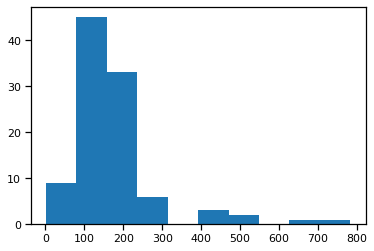

In [66]:
plt.hist(mdata['mdiff'])

(array([ 9., 31., 28., 15., 10.,  4.,  1.,  1.,  0.,  1.]),
 array([ 26.27834927,  53.61098179,  80.94361432, 108.27624684,
        135.60887936, 162.94151189, 190.27414441, 217.60677694,
        244.93940946, 272.27204199, 299.60467451]),
 <BarContainer object of 10 artists>)

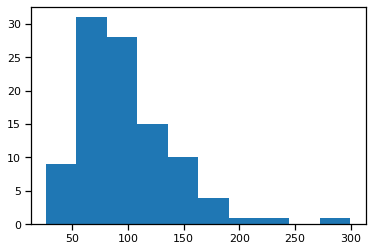

In [67]:
plt.hist(mdata['std1'])

(array([15., 28., 18., 22., 12.,  3.,  1.,  0.,  0.,  1.]),
 array([ 29.51265574,  57.42409597,  85.3355362 , 113.24697643,
        141.15841666, 169.06985689, 196.98129712, 224.89273735,
        252.80417758, 280.7156178 , 308.62705803]),
 <BarContainer object of 10 artists>)

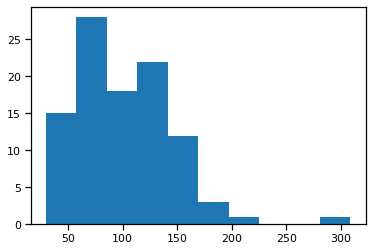

In [68]:
plt.hist(mdata['std2'])

In [69]:
pathex2 = '../data/filtered_cleanedexp2.csv'
df = pd.read_csv(pathex2)
for ID in np.unique(df['id']):    
    this_subject = df[df['id'] == ID] # set to one particular subject
    X = np.array(this_subject['timecollect'][this_subject['timecollect']<1000])# when using np.log, make sure nan and infinity are excluded. 
    X = X.reshape(-1,1)
    data['id'].append(ID)
    data['Experiment'].append(2)
    AIC1, BIC1, model = learn_gaussian_mixture(X, n_mixture = 1)
    data['AIC 1 Mixture'].append(AIC1[0])
    data['BIC 1 Mixture'].append(BIC1[0])
    AIC2, BIC2, model = learn_gaussian_mixture(X, n_mixture = 2)
    
    mdata['mean1'].append(model[0].means_[0][0])
    mdata['mean2'].append(model[0].means_[1][0])
    mdata['std1'].append(np.sqrt(model[0].covariances_[0][0][0]))
    mdata['std2'].append(np.sqrt(model[0].covariances_[1][0][0]))
    mdata['mdiff'].append(abs(model[0].means_[0][0] - model[0].means_[1][0]))
    
    data['AIC 2 Mixture'].append(AIC2[0])
    data['BIC 2 Mixture'].append(BIC2[0])
    AIC3, BIC3, model = learn_gaussian_mixture(X, n_mixture = 3)
    data['AIC 3 Mixture'].append(AIC3[0])
    data['BIC 3 Mixture'].append(BIC3[0])    
    

    
    mdata['id'].append(ID)
    mdata['Best N Mixture AIC'].append(str(ott[np.argmin([AIC1, AIC2, AIC3])]))
    mdata['Best N Mixture BIC'].append(str(ott[np.argmin([BIC1, BIC2, BIC3])]))
    mdata['Experiment'].append(2)
    i = i+1

In [70]:
for key in data:
    print(key, len(data[key]))
    
for key in mdata:
    print(key, len(mdata[key]))
    



id 190
AIC 1 Mixture 190
AIC 2 Mixture 190
AIC 3 Mixture 190
BIC 1 Mixture 190
BIC 2 Mixture 190
BIC 3 Mixture 190
Experiment 190
id 190
Best N Mixture AIC 190
Experiment 190
Best N Mixture BIC 190
mean1 190
mean2 190
std1 190
std2 190
mdiff 190


In [71]:
DATA = pd.DataFrame.from_dict(data)
mDATA = pd.DataFrame.from_dict(mdata)

In [73]:
DATA.to_csv('../data/AICBICGMM.csv', index = True, header = True)

In [57]:
# histogram with the mixture of gaussian having the smallest AIC and BIC. How many particpants falls into each category. 

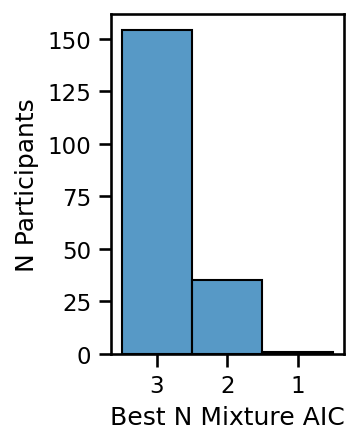

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(dpi = 150, figsize = (2,3))
sns.histplot(data=mDATA, x="Best N Mixture AIC")
plt.ylabel('N Participants')
plt.show()

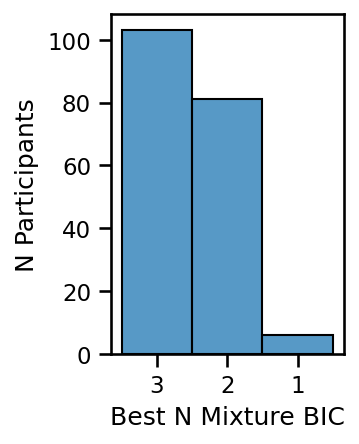

In [85]:
fig = plt.figure(dpi = 150, figsize = (2,3))

sns.histplot(data=mDATA, x="Best N Mixture BIC")

plt.ylabel('N Participants')
plt.show()